# [Multimodal single-cell analyses revealmechanisms of perianal fistula in diversepatients with Crohn’s disease](https://pubmed.ncbi.nlm.nih.gov/38663404/)
GEO: [GSE260842](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE260842)

In [ ]:
suppressPackageStartupMessages({
    library(Seurat)
    library(patchwork)
    library(celldex)
    library(SingleR)
    library(ShinyCell)
    library(harmony)
    library(glmGamPoi)
    library(stringr)
    })

In [3]:
setwd("/data/nsiegel/projects/2024_06_10_Levantovsky.et.al-38663404")

In [21]:
source("/data/nsiegel/projects/scTools/R/process.geo.data.r")
GEOID <- "GSE260842"
seurat_objects <- process.GEO.data(GEOID)

Found 1 file(s)

GSE260842_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpcDj4hw/GSE260842_series_matrix.txt.gz

Using locally cached version of GPL24676 found here:
/tmp/RtmpcDj4hw/GPL24676.soft.gz 



Removed file paths:


In [22]:
load(file = "objects/GSE260842.rda")

In [23]:
length(seurat_objects)
seurat_objects

[1] 34

$GSM8125209
An object of class Seurat 
20735 features across 6104 samples within 1 assay 
Active assay: RNA (20735 features, 0 variable features)
 1 layer present: counts

$GSM8125210
An object of class Seurat 
20191 features across 3595 samples within 1 assay 
Active assay: RNA (20191 features, 0 variable features)
 1 layer present: counts

$GSM8125211
An object of class Seurat 
12988 features across 1089 samples within 1 assay 
Active assay: RNA (12988 features, 0 variable features)
 1 layer present: counts

$GSM8125212
An object of class Seurat 
12796 features across 877 samples within 1 assay 
Active assay: RNA (12796 features, 0 variable features)
 1 layer present: counts

$GSM8125213
An object of class Seurat 
17575 features across 3788 samples within 1 assay 
Active assay: RNA (17575 features, 0 variable features)
 1 layer present: counts

$GSM8125214
An object of class Seurat 
17537 features across 3048 samples within 1 assay 
Active assay: RNA (17537 features, 0 variable featu

In [24]:
obj <- merge(x = seurat_objects[[1]], 
                    y = c(seurat_objects[[2]], seurat_objects[[3]], seurat_objects[[4]], 
                          seurat_objects[[5]], seurat_objects[[6]], seurat_objects[[7]], 
                          seurat_objects[[8]], seurat_objects[[9]], seurat_objects[[10]], 
                          seurat_objects[[11]], seurat_objects[[12]], seurat_objects[[13]], 
                          seurat_objects[[14]], seurat_objects[[15]], seurat_objects[[16]], 
                          seurat_objects[[17]], seurat_objects[[18]], seurat_objects[[19]], 
                          seurat_objects[[20]], seurat_objects[[21]], seurat_objects[[22]], 
                          seurat_objects[[23]], seurat_objects[[24]], seurat_objects[[25]], 
                          seurat_objects[[26]], seurat_objects[[27]], seurat_objects[[28]], 
                          seurat_objects[[29]], seurat_objects[[30]], seurat_objects[[31]], 
                          seurat_objects[[32]], seurat_objects[[33]], seurat_objects[[34]]))


# Print the merged object
save(obj, file = file.path("objects", "00.rda"))

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [25]:
# load(file = file.path("objects", "00.rda"))
obj <- JoinLayers(obj)
obj[["percent.mt"]] <- PercentageFeatureSet(object = obj, pattern = "^MT-")
obj <- subset(obj, subset = nFeature_RNA > 350 & nFeature_RNA < 5000 & percent.mt < 10)
obj
save(obj, file = file.path("objects", "01.rda"))

An object of class Seurat 
28190 features across 118166 samples within 1 assay 
Active assay: RNA (28190 features, 0 variable features)
 1 layer present: counts

In [26]:
obj <- SCTransform(obj, ncells = 3000,  variable.features.n = 2000, vst.flavor="v2", method = 'glmGamPoi', conserve.memory = TRUE)
save(obj, file=file.path("objects", "02.rda"))

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 25818 by 118166

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3000 cells

Found 183 outliers - those will be ignored in fitting/regularization step


Skip calculation of full residual matrix

Will not return corrected UMI because residual type is not set to 'pearson'

Calculating gene attributes

Wall clock passed: Time difference of 17.94223 secs

Setting min_variance based on median UMI:  0.04

Calculating variance for residuals of type pearson for 25818 genes

Determine variable features

Setting min_variance based on median UMI:  0.16

Calculating residuals of type pearson for 2000 genes



  |======================================================================| 100%


Computing corrected UMI count matrix

Centering data matrix

Getting residuals for block 1(of 40) for counts dataset

Getting residuals for block 2(of 40) for counts dataset

Getting residuals for block 3(of 40) for counts dataset

Getting residuals for block 4(of 40) for counts dataset

Getting residuals for block 5(of 40) for counts dataset

Getting residuals for block 6(of 40) for counts dataset

Getting residuals for block 7(of 40) for counts dataset

Getting residuals for block 8(of 40) for counts dataset

Getting residuals for block 9(of 40) for counts dataset

Getting residuals for block 10(of 40) for counts dataset

Getting residuals for block 11(of 40) for counts dataset

Getting residuals for block 12(of 40) for counts dataset

Getting residuals for block 13(of 40) for counts dataset

Getting residuals for block 14(of 40) for counts dataset

Getting residuals for block 15(of 40) for counts dataset

Getting residuals for block 16(of 40) for counts dataset

Getting residuals fo

In [27]:
# load(file=file.path("objects", "02.rda"))
obj <- RunPCA(obj, npcs = 30, verbose = TRUE)
obj <- RunUMAP(obj, reduction = "pca", dims = 1:20)
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:20)
obj <- FindClusters(obj, resolution = 0.5)
obj
save(obj, file=file.path("objects", "03.rda"))

PC_ 1 
Positive:  IL11RA.1, TNFRSF25.1, CD152, CXCR4.1, HLA-DR, NOTCH3.1, CD38.1, CD25, PDPN.1, PTGER4.1 
	   CD130, CD197, CD14.1, IL23RA, COL3A1, CD279, PTGER2.1, DCN, CD185, MRGPRX2.1 
	   LUM, COL1A2, COL1A1, CXCL14, ADAMDEC1, CD3, CD61, MT2A, CD140a, POSTN 
Negative:  IGKC, JCHAIN, IGHA1, IGHG1, IGLC2, IGHA2, IGHG3, IGHG2, IGLC3, IGHG4 
	   IGLC1, IGKV3-20, IGKV1-5, IGKV4-1, MZB1, IGHM, IGKV3-11, IGHV3-7, IGHV3-23, SSR4 
	   IGHV3-15, IGHV3-30, IGKV1-39, IGHGP, IGKV3-15, DERL3, IGKV1-9, IGLV2-14, IGHV3-33, IGHV3-74 
PC_ 2 
Positive:  LYZ, HLA-DRA, MT2A, CXCL8, C1QB, DCN, IL1B, SOD2, COL3A1, CCL3 
	   CCL4, C1QA, LUM, HLA-DRB1, FCER1G, AIF1, ADAMDEC1, COL1A1, COL1A2, CXCL9 
	   HLA-DPA1, HLA-DPB1, GLUL, S100A8, CCL3L1, S100A9, CXCL2, IER3, IFITM3, IFI30 
Negative:  IGKC, IL11RA.1, CD38.1, TNFRSF25.1, CD152, IGHA1, CXCR4.1, HLA-DR, NOTCH3.1, CD25 
	   PTGER4.1, CD197, CD130, IL23RA, CD14.1, CD279, PDPN.1, JCHAIN, PTGER2.1, MRGPRX2.1 
	   CD185, CD3, CD140a, CD61, IGHA2, IGHG1, CD4.1

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 118166
Number of edges: 3874885

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9631
Number of communities: 54
Elapsed time: 40 seconds


An object of class Seurat 
54008 features across 118166 samples within 2 assays 
Active assay: SCT (25818 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [28]:
colnames(obj@meta.data)

[1] "orig.ident"              "nCount_RNA"             
 [3] "nFeature_RNA"            "title"                  
 [5] "geo_accession"           "status"                 
 [7] "submission_date"         "last_update_date"       
 [9] "type"                    "channel_count"          
[11] "source_name_ch1"         "organism_ch1"           
[13] "characteristics_ch1"     "characteristics_ch1.1"  
[15] "molecule_ch1"            "extract_protocol_ch1"   
[17] "extract_protocol_ch1.1"  "taxid_ch1"              
[19] "description"             "data_processing"        
[21] "data_processing.1"       "data_processing.2"      
[23] "data_processing.3"       "data_processing.4"      
[25] "platform_id"             "contact_name"           
[27] "contact_email"           "contact_laboratory"     
[29] "contact_department"      "contact_institute"      
[31] "contact_address"         "contact_city"           
[33] "contact_state"           "contact_zip.postal_code"
[35] "contact_country"         "data_row_count"         
[37] "instrument_model"        "library_selection"      
[39] "library_source"          "library_strategy"       
[41] "relation"                "relation.1"             
[43] "supplementary_file_1"    "procedure.ch1"          
[45] "tissue.ch1"              "percent.mt"             
[47] "nCount_SCT"              "nFeature_SCT"           
[49] "SCT_snn_res.0.5"         "seurat_clusters"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



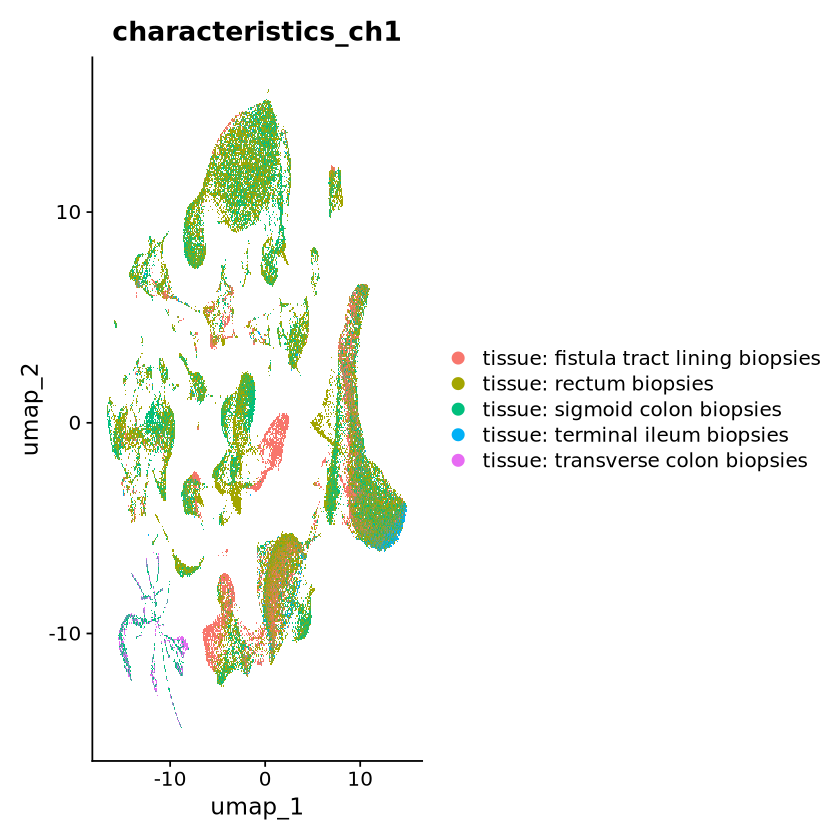

In [29]:
DimPlot(obj, group.by = "characteristics_ch1")

In [30]:
blueprint.ref <- celldex::BlueprintEncodeData()
monaco.ref <- celldex::MonacoImmuneData()

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache



In [32]:
sce <- LayerData(obj)
blueprint.main <- SingleR(test = sce, assay.type.test = 1, ref = blueprint.ref, labels = blueprint.ref$label.main)
obj@meta.data$blueprint.main <- blueprint.main$pruned.labels
save(obj, file=file.path("objects", "04.rda"))

In [36]:
table(obj@meta.data$blueprint.main)


       Adipocytes        Astrocytes           B-cells      CD4+ T-cells 
             1794                34             57930             15735 
     CD8+ T-cells      Chondrocytes                DC Endothelial cells 
            16151               442               629              1861 
      Eosinophils  Epithelial cells      Erythrocytes       Fibroblasts 
                2               964               135             10654 
              HSC     Keratinocytes       Macrophages       Melanocytes 
             3053                72              1832                24 
  Mesangial cells         Monocytes          Myocytes           Neurons 
                6              4333                77                 3 
      Neutrophils          NK cells         Pericytes   Skeletal muscle 
               18              1946                71                12 
    Smooth muscle 
               51 

In [46]:
obj <- SetIdent(obj, value = "blueprint.main")
remove_low_count_cells <- function(seurat_obj, metadata_column, threshold = 20) {

  obj <- SetIdent(obj, value = metadata_column)

  total_counts <- table(seurat_obj@meta.data[[metadata_column]])

  low_count_cells <- names(total_counts[total_counts < threshold])

  seurat_obj <- subset(seurat_obj, idents = low_count_cells, invert = TRUE)

  return(seurat_obj)
}
obj <- remove_low_count_cells(seurat_obj = obj, metadata_column = "blueprint.main", threshold = 20)

In [47]:
table(obj@meta.data$blueprint.main)


       Adipocytes        Astrocytes           B-cells      CD4+ T-cells 
             1794                34             57930             15735 
     CD8+ T-cells      Chondrocytes                DC Endothelial cells 
            16151               442               629              1861 
 Epithelial cells      Erythrocytes       Fibroblasts               HSC 
              964               135             10654              3053 
    Keratinocytes       Macrophages       Melanocytes         Monocytes 
               72              1832                24              4333 
         Myocytes          NK cells         Pericytes     Smooth muscle 
               77              1946                71                51 

In [48]:
obj <- SetIdent(obj, value = "blueprint.main")
obj <- subset(obj, idents = c("CD8+ T-cells", "B-cells", "CD4+ T-cells", "DC", "NK cells", "Macrophages", "Monocytes"), invert = FALSE)
table(obj@meta.data$blueprint.main)


     B-cells CD4+ T-cells CD8+ T-cells           DC  Macrophages    Monocytes 
       57930        15735        16151          629         1832         4333 
    NK cells 
        1946 

In [57]:
print(head(obj@meta.data))

                        orig.ident nCount_RNA nFeature_RNA
AAACCCACAAGGCCTC-1_1 SeuratProject      20865         1719
AAACCCACAGGACTAG-1_1 SeuratProject      38853         1908
AAACGAACACATATGC-1_1 SeuratProject      19619         1683
AAACGAATCATAGCAC-1_1 SeuratProject      22175         1721
AAACGAATCGCGGACT-1_1 SeuratProject      24894         1480
AAACGCTTCGGCTGAC-1_1 SeuratProject      15903         1137
                                     title geo_accession                status
AAACCCACAAGGCCTC-1_1 Perianal1_Sig_cytoRNA    GSM8125209 Public on May 16 2024
AAACCCACAGGACTAG-1_1 Perianal1_Sig_cytoRNA    GSM8125209 Public on May 16 2024
AAACGAACACATATGC-1_1 Perianal1_Sig_cytoRNA    GSM8125209 Public on May 16 2024
AAACGAATCATAGCAC-1_1 Perianal1_Sig_cytoRNA    GSM8125209 Public on May 16 2024
AAACGAATCGCGGACT-1_1 Perianal1_Sig_cytoRNA    GSM8125209 Public on May 16 2024
AAACGCTTCGGCTGAC-1_1 Perianal1_Sig_cytoRNA    GSM8125209 Public on May 16 2024
                     submission_da

In [51]:
table(obj@meta.data$monaco.fine)


   Central memory CD8 T cells           Classical monocytes 
                          878                          1330 
  Effector memory CD8 T cells             Exhausted B cells 
                         2977                          4893 
    Follicular helper T cells        Intermediate monocytes 
                         2789                          2541 
        Low-density basophils       Low-density neutrophils 
                          132                            11 
                   MAIT cells       Myeloid dendritic cells 
                         3665                          2409 
                Naive B cells             Naive CD4 T cells 
                         6170                           384 
            Naive CD8 T cells          Natural killer cells 
                          198                          1646 
      Non classical monocytes   Non-switched memory B cells 
                           11                          3300 
           Non-Vd2 gd T

In [50]:
sce <- LayerData(obj)
monaco.fine <- SingleR(test = sce, assay.type.test = 1, ref = monaco.ref, labels = monaco.ref$label.fine)
obj@meta.data$monaco.fine <- monaco.fine$pruned.labels
save(obj, file=file.path('objects', '05.rda'))

In [71]:
# Clean up columns
obj@meta.data$Condition <- str_remove(obj@meta.data$tissue.ch1, " biopsies")
obj@meta.data$Procedure <- obj@meta.data$procedure.ch1

# Select needed columns
columns_to_keep <-  c("orig.ident", "Condition", "Procedure", "blueprint.main", "monaco.fine")
obj@meta.data <- obj@meta.data[, columns_to_keep, drop = FALSE]

save(obj, file=file.path('objects', '06.rda'))

In [72]:
seu =  obj
scConf = createConfig(seu)
makeShinyApp(seu, scConf,
             gene.mapping = TRUE,
             shiny.title = "Mechanisms of perianal fistula in Crohns scRNAseq",
             shiny.dir = "perianal_fistula_crohns_scRNA-seq_GSE260842/",
             gex.assay = "SCT",
             default.multigene = c('LILRB1', 'PDCD1')) 
system("R -e \"shiny::runApp('perianal_fistula_crohns_scRNA-seq_GSE260842')\"")

In [ ]:
system("R -e \"shiny::runApp('perianal_fistula_crohns_scRNA-seq_GSE260842')\"")